In [1]:
def check(coord_ori, coord_result, target) :
    if coord_result <= coord_ori*(1+target) and coord_result >= coord_ori*(1-target) :
        return True
    else :
        return False

In [2]:
import cv2

def comparsion(origin, target) :
    result = cv2.matchTemplate(origin, target, cv2.TM_SQDIFF_NORMED)

    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
    x, y = minLoc
    h, w = target.shape[0:2]

    return [x, x+w, y, y+h]

In [3]:
# 정상의 경우

original coordinates : [316, 361, 213, 340]
predicted coordinates : 316 predicted coordinates : 361 predicted coordinates : 213 predicted coordinates : 340 

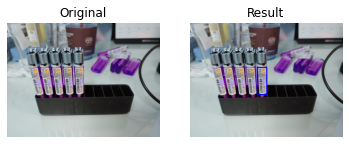

In [8]:
from matplotlib import pyplot as plt

origin = cv2.imread("ligher_ori.jpg")
dst = cv2.imread("ligher_ori.jpg")
hurt = cv2.imread("ligher_ori.jpg")

coords = [316, 361, 213, 340] #절대좌표

hurt_modi = hurt.copy()
hurt_modi = hurt[coords[2]:coords[3], coords[0]:coords[1]] #절대좌표로 잘라냄

coords_result = comparsion(dst, hurt_modi) #비교

print("original coordinates : ", end='')
print(coords) #절대좌표 출력

# 비교 결과 확인
for i in range(4) :
    print("predicted coordinates :", coords_result[i], end=' ')
    if not check(coords[i], coords_result[i], 0.03) :
        print("This is faulty!")
        
# 화면에 출력
dst = cv2.rectangle(dst, (coords_result[0], coords_result[2]), (coords_result[1], coords_result[3]) , (0, 0, 255), 3)

fig = plt.figure()
rows = 1
cols = 2
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(origin)
ax1.set_title('Original')
ax1.axis("off")
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(dst)
ax2.set_title('Result')
ax2.axis("off")
 
plt.show()

In [ ]:
# 불량의 경우

original coordinates : [316, 361, 213, 340]
predicted coordinates : 645 This is faulty!
predicted coordinates : 690 This is faulty!
predicted coordinates : 178 This is faulty!
predicted coordinates : 305 This is faulty!


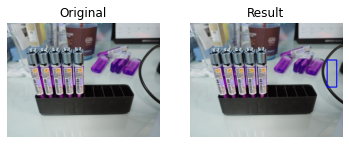

In [9]:
dst = cv2.imread("ligher_ori.jpg")
hurt = cv2.imread("ligher_hurt.jpg")

hurt_modi = hurt.copy()
hurt_modi = hurt[coords[2]:coords[3], coords[0]:coords[1]] #절대좌표로 잘라냄

coords_result = comparsion(dst, hurt_modi) #비교

print("original coordinates : ", end='')
print(coords) #절대좌표 출력

# 비교 결과 확인
for i in range(4) :
    print("predicted coordinates :", coords_result[i], end=' ')
    if not check(coords[i], coords_result[i], 0.03) :
        print("This is faulty!")
        
# 화면에 출력
dst = cv2.rectangle(dst, (coords_result[0], coords_result[2]), (coords_result[1], coords_result[3]) , (0, 0, 255), 3)

fig = plt.figure()
rows = 1
cols = 2
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(origin)
ax1.set_title('Original')
ax1.axis("off")
ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(dst)
ax2.set_title('Result')
ax2.axis("off")
 
plt.show()